In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/insurance.csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**EDA**

**Let's check for outliers in BMI.**

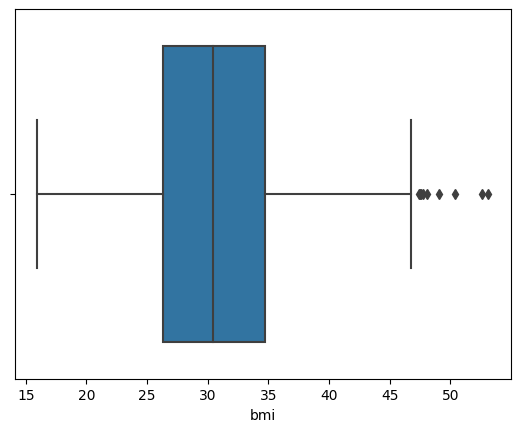

In [ ]:
sns.boxplot(x='bmi',data=df);

The values seem to be clustered between 26-35. Let's visualize the distribution to have a clearer understanding.

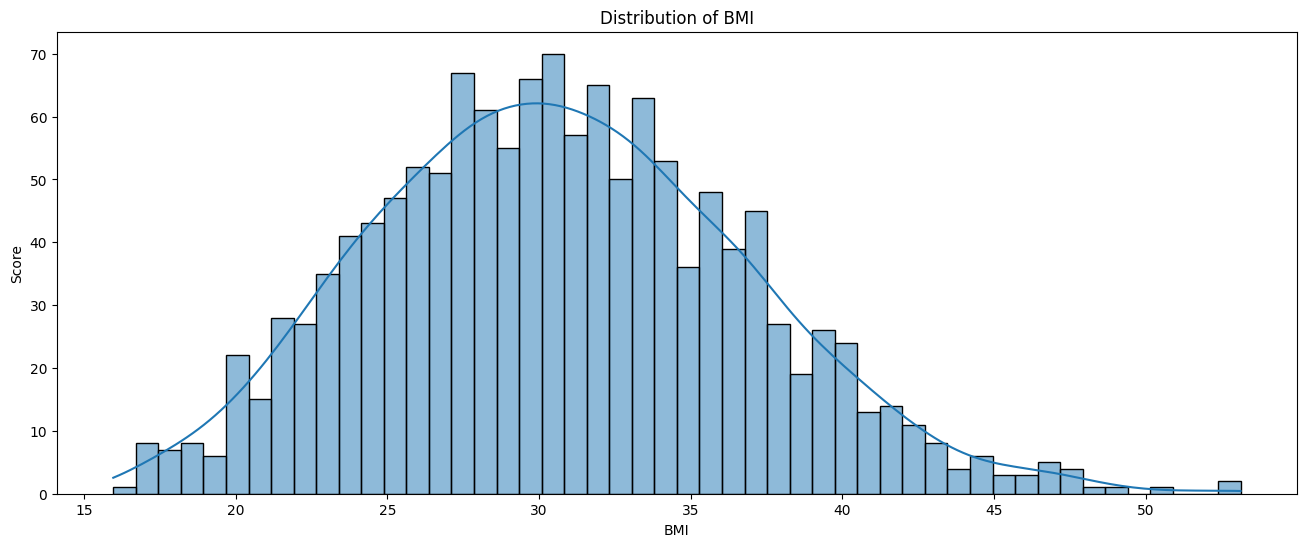

In [ ]:
plt.figure(figsize=(16,6))
sns.histplot(df["bmi"], bins = 50, kde = True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Score')
plt.show()

Let's apply the IQR method for outlier detection:

IQR = Q3 - Q1, calculate this value.

Lower Bound: (Q1 - 1.5 * IQR)

Upper Bound: (Q3 + 1.5 * IQR)

Remove values from the dataframe (df) that exceed the lower and upper bounds.

In [ ]:
Q1 = df.bmi.quantile(0.25)
Q3 = df.bmi.quantile(0.75)

IQR = Q3 - Q1
IQR

8.3975

In [ ]:
lower_bound = (Q1 - 1.5 * IQR)

upper_bound = (Q3 + 1.5 * IQR)

In [ ]:
upper_bound, lower_bound

(47.290000000000006, 13.7)

For BMI, the minimum value was 15.96, and the maximum value was 53.13. Therefore, we don't see any values exceeding the lower bound. However, there are values exceeding the upper bound. Let's identify these values.

In [ ]:
df[df['bmi'] > upper_bound]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


Let's collect the indices of the rows with these values and then remove them from the dataset.

In [ ]:
selected_rows = df[df['bmi'] > upper_bound]
index_list = selected_rows.index.tolist()
index_list

[116, 286, 401, 543, 847, 860, 1047, 1088, 1317]

In [ ]:
df = df.drop(df.index[index_list])

<Axes: xlabel='bmi'>

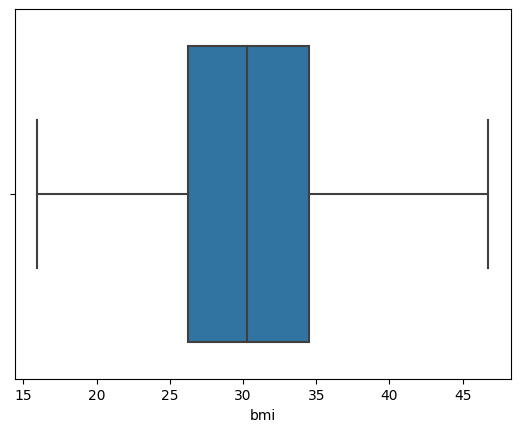

In [ ]:
sns.boxplot(x='bmi',data=df)

**Let's analyze smokers by regions.**

Text(0.5, 1.0, 'Smokers according to region')

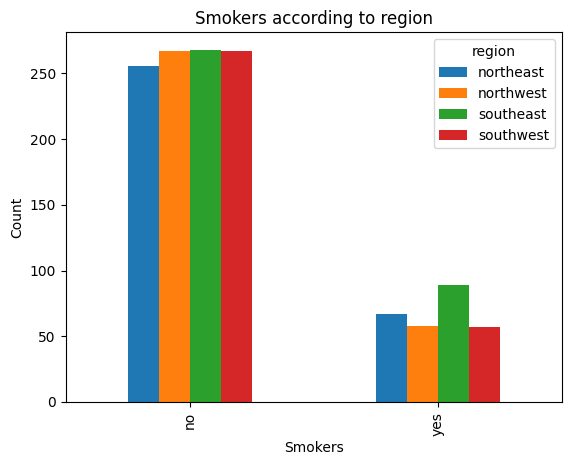

In [ ]:
smoker_region=df.groupby("smoker")["region"].value_counts().unstack()
smoker_region.plot(kind="bar")
plt.xlabel("Smokers")
plt.ylabel("Count")
plt.title("Smokers according to region")

Smokers and non-smokers are generally evenly distributed. However, we can say that in the southeast region, there are more smokers compared to other regions.

**Now, let's examine the relationship between BMI and gender.**

Text(0.5, 1.0, 'BMI according to sex')

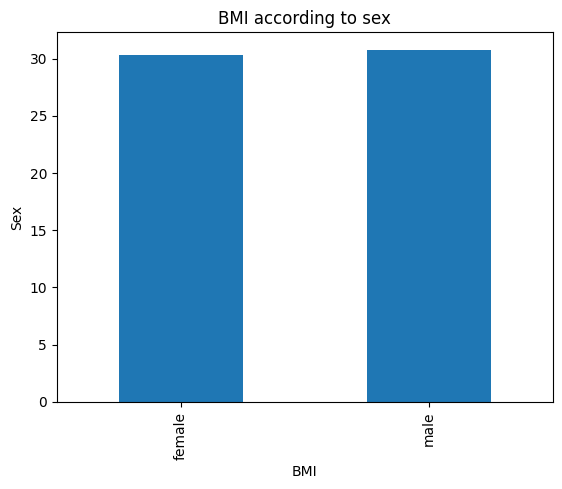

In [ ]:
sex_bmi=df.groupby("sex")["bmi"].mean()
sex_bmi.plot(kind="bar")
plt.xlabel("BMI")
plt.ylabel("Sex")
plt.title("BMI according to sex")

It appears that there isn't a significant relationship between gender and BMI.

**Now, let's look at the number of children by region.**

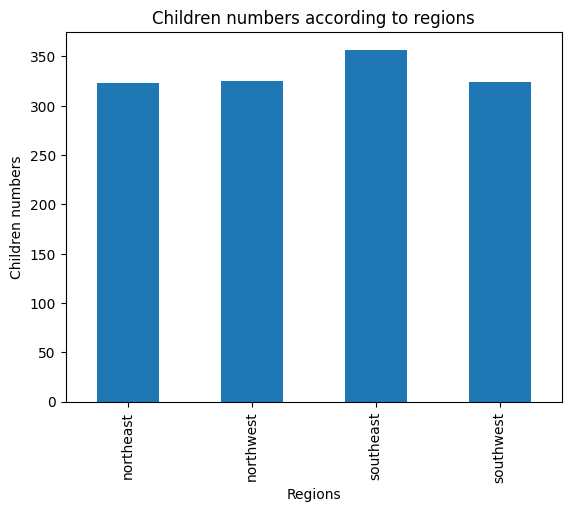

In [ ]:
region_child=df.groupby("region")["children"].count()
region_child.plot(kind="bar");
plt.xlabel("Regions")
plt.ylabel("Children numbers")
plt.title("Children numbers according to regions");

We can say that those living in the Southeast have more children.

**Now, let's examine the relationship between age and BMI.**

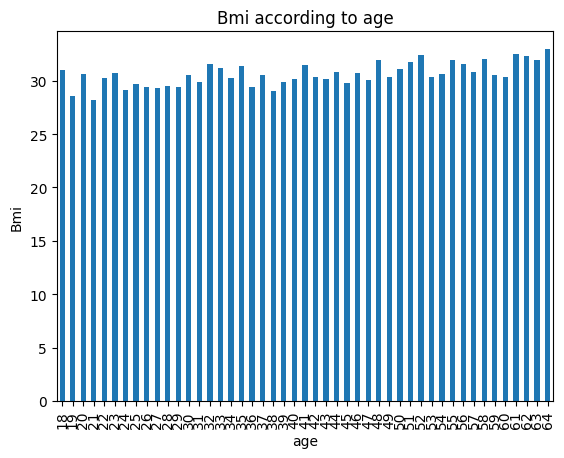

In [ ]:
age_bmi=df.groupby("age")["bmi"].mean()
age_bmi.plot(kind="bar")
plt.xlabel("age")
plt.ylabel("Bmi")
plt.title("Bmi according to age");

It appears that there is a generally even distribution between BMI and age.

**Now, let's examine the relationship between BMI and the number of children.**

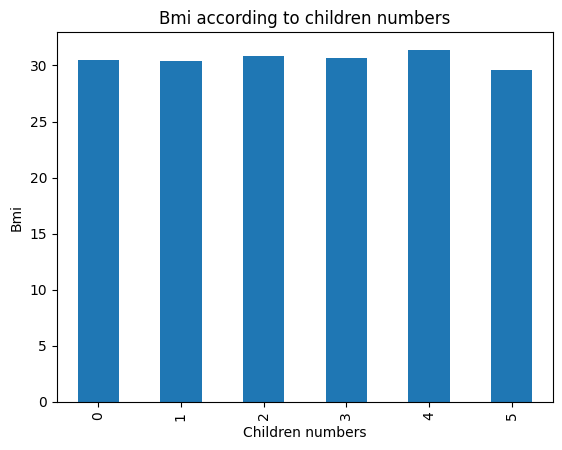

In [ ]:
child_bmi=df.groupby("children")["bmi"].mean()
child_bmi.plot(kind="bar")
plt.xlabel("Children numbers")
plt.ylabel("Bmi")
plt.title("Bmi according to children numbers");

It seems that we couldn't observe a significant relationship between BMI and the number of children.

**Now, let's examine the relationship between BMI and charges.**

<Axes: xlabel='bmi', ylabel='charges'>

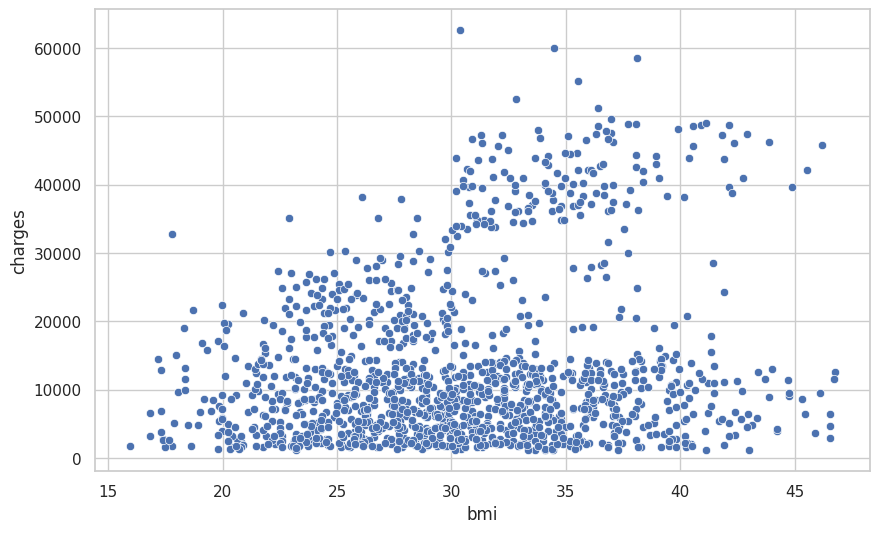

In [ ]:
sns.set(style='whitegrid')
f = plt.figure(figsize=(10,6))
sns.scatterplot(x='bmi', y='charges', data=df)

We can say that as BMI increases, charges also tend to increase.

**Now, let's examine the relationship between region, smoking status, and BMI.**

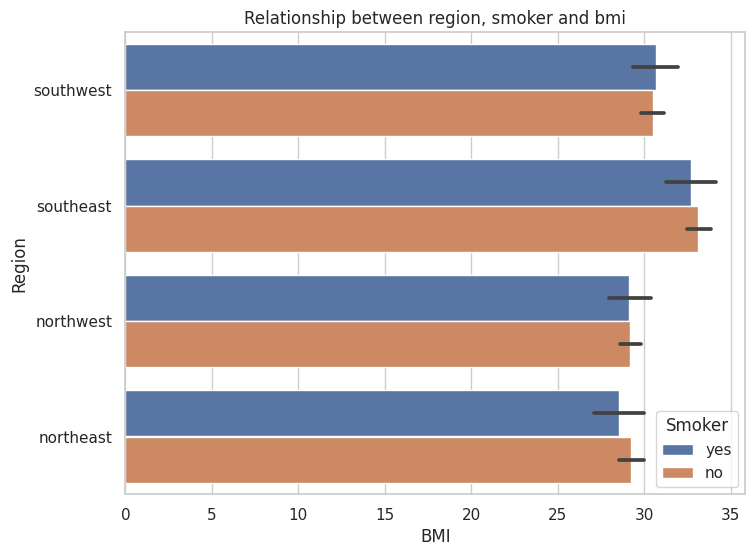

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x="bmi", y="region", hue="smoker", data=df)
plt.title("Relationship between region, smoker and bmi")
plt.xlabel("BMI")
plt.ylabel("Region")
plt.legend(title="Smoker")
plt.show()

Regardless of smoking status, those in the Southeast have slightly higher BMI values.

**Now, let's examine the relationship between charges, smoking status, and BMI.**

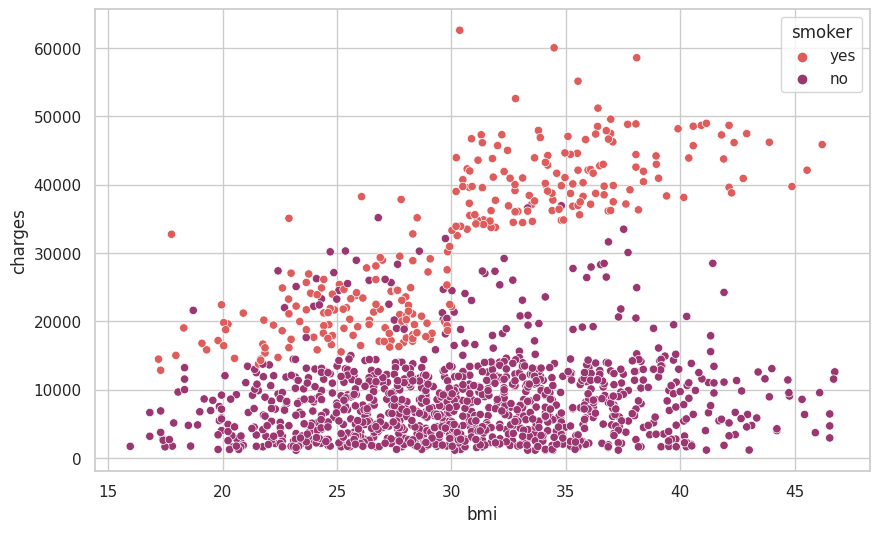

In [ ]:
sns.set(style='whitegrid')
f = plt.figure(figsize=(10,6))
sns.scatterplot(x='bmi', y='charges', data=df, palette='flare', hue='smoker');

It appears that the insurance charges are lower for non-smokers and higher for smokers.

For smokers with a BMI over 30, the charges are higher compared to smokers with a BMI under 30.

age         0.302022
bmi         0.193196
children    0.069739
charges     1.000000
Name: charges, dtype: float64


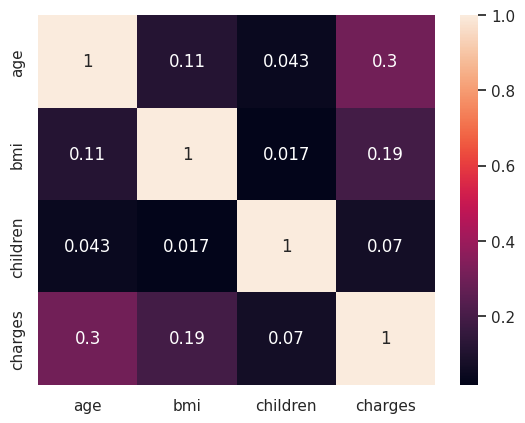

In [ ]:
sns.heatmap(df.corr(), annot=True)
print(df.corr()['charges'])

We observe a positive correlation between age and BMI with charges.

**Now, let's look at the relationship between age and charges.**

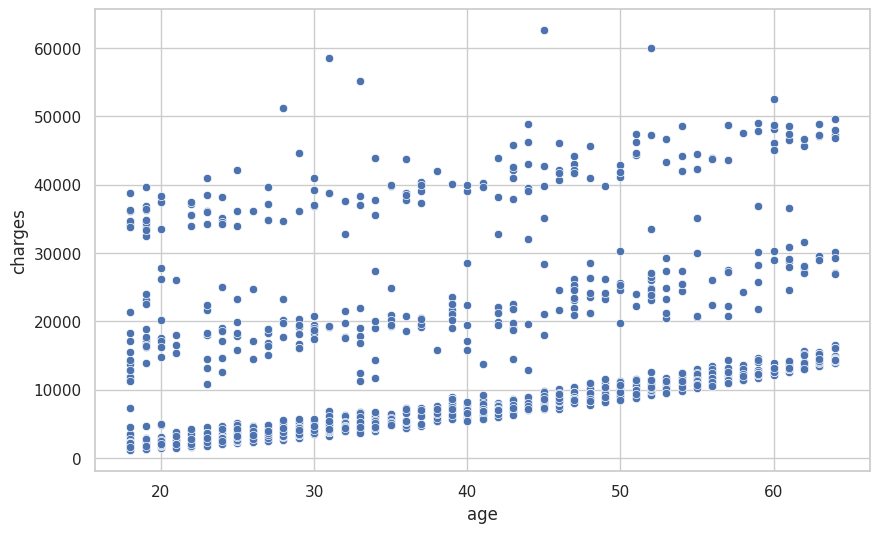

In [ ]:
sns.set(style='whitegrid')
f = plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='charges', data=df);

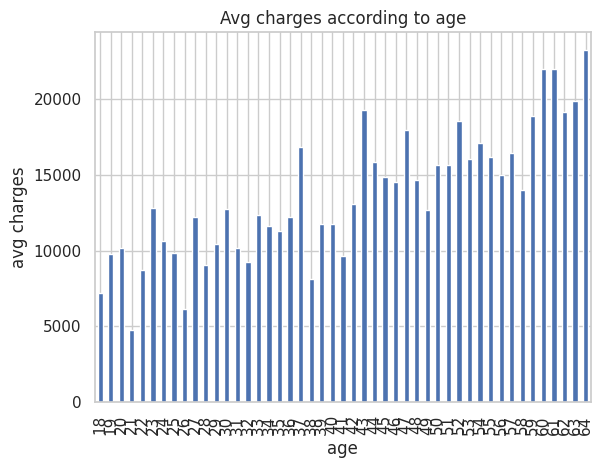

In [ ]:
avg_charges = df.groupby("age")["charges"].mean(numeric_only=True)
avg_charges.plot(kind="bar")
plt.xlabel("age")
plt.ylabel("avg charges")
plt.title("Avg charges according to age")
plt.show()

Using the age column, let's create five new columns.

In [ ]:
age_bins = [0, 18, 30, 45, 60, 99]
age_labels = ["0-18", "18-30", "30-45", "45-60", "60+"]

df["age_group"] = pd.cut(df["age"], bins=age_bins, labels=age_labels, right=False)

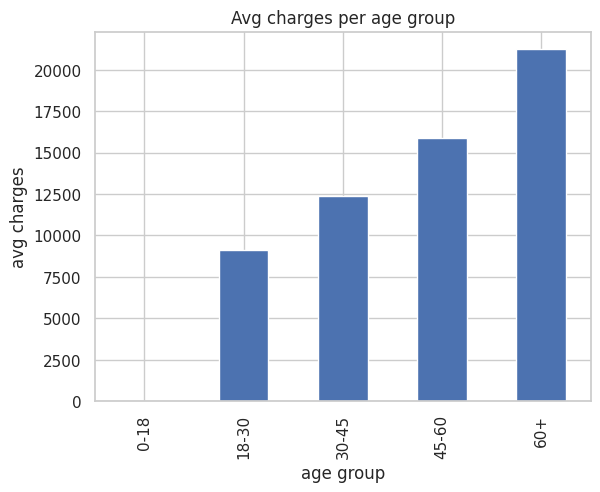

In [ ]:
avg_charges_per_age_group = df.groupby("age_group")["charges"].mean(numeric_only=True)
avg_charges_per_age_group.plot(kind="bar")
plt.xlabel("age group")
plt.ylabel("avg charges")
plt.title("Avg charges per age group")
plt.show()

**Let's examine the relationship between Charges and BMI.**

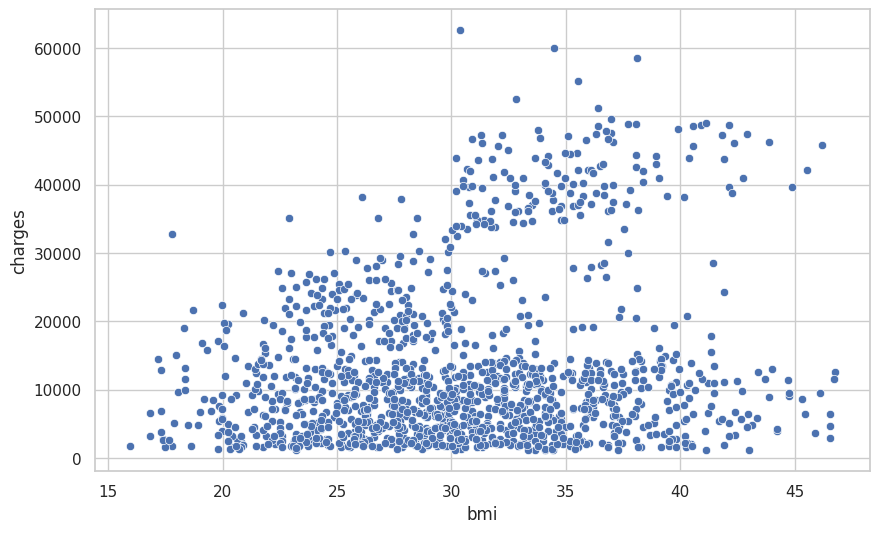

In [ ]:
sns.set(style='whitegrid')
f = plt.figure(figsize=(10,6))
sns.scatterplot(x='bmi', y='charges', data=df);

We had just categorized age into five new categories; similarly, let's create four new categories for BMI.

In [ ]:
bmi_bins = [0, 18.5, 24.9, 29.9, float('inf')]
bmi_labels = ["underweight", "normal weight", "overweight", "obese"]

df["bmi_group"] = pd.cut(df["bmi"], bins=bmi_bins, labels=bmi_labels, right=False)

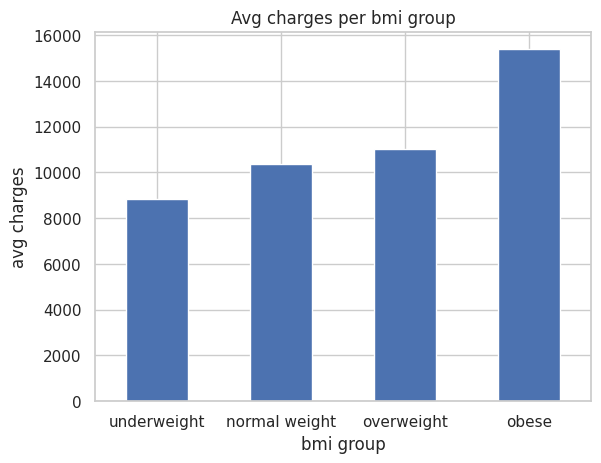

In [ ]:
avg_charges_per_bmi_group = df.groupby("bmi_group")["charges"].mean(numeric_only=True)
avg_charges_per_bmi_group.plot(kind="bar")
plt.xlabel("bmi group")
plt.xticks(rotation=0)
plt.ylabel("avg charges")
plt.title("Avg charges per bmi group")
plt.show()

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_group,bmi_group
0,19,female,27.900,0,yes,southwest,16884.92400,18-30,overweight
1,18,male,33.770,1,no,southeast,1725.55230,18-30,obese
2,28,male,33.000,3,no,southeast,4449.46200,18-30,obese
3,33,male,22.705,0,no,northwest,21984.47061,30-45,normal weight
4,32,male,28.880,0,no,northwest,3866.85520,30-45,overweight


**Data Preprocessing**

In [ ]:
df = pd.get_dummies(df,
                    columns=['sex','smoker','region', 'age_group','bmi_group'],
                    prefix=['sex','smoker','region', 'age_group','bmi_group'],
                    drop_first=True)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age_group_18-30,age_group_30-45,age_group_45-60,age_group_60+,bmi_group_normal weight,bmi_group_overweight,bmi_group_obese
0,19,27.900,0,16884.92400,0,1,0,0,1,1,0,0,0,0,1,0
1,18,33.770,1,1725.55230,1,0,0,1,0,1,0,0,0,0,0,1
2,28,33.000,3,4449.46200,1,0,0,1,0,1,0,0,0,0,0,1
3,33,22.705,0,21984.47061,1,0,1,0,0,0,1,0,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0,0,1,0,0,0,1,0


In [ ]:
df =df.drop(columns=['age','bmi'])

In [ ]:
df.head()

,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age_group_18-30,age_group_30-45,age_group_45-60,age_group_60+,bmi_group_normal weight,bmi_group_overweight,bmi_group_obese
0,0,16884.92400,0,1,0,0,1,1,0,0,0,0,1,0
1,1,1725.55230,1,0,0,1,0,1,0,0,0,0,0,1
2,3,4449.46200,1,0,0,1,0,1,0,0,0,0,0,1
3,0,21984.47061,1,0,1,0,0,0,1,0,0,1,0,0
4,0,3866.85520,1,0,1,0,0,0,1,0,0,0,1,0


In [ ]:
y = df['charges']
X = df.drop(columns='charges', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.fit_transform(X_test)

**Model Building**

In [ ]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
model.fit(X_train1, y_train)

LinearRegression()

In [ ]:
ypred= model.predict(X_test1)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
print('MSE : ', mean_squared_error(y_test,ypred).round(2))
print('MAE : ', mean_absolute_error(y_test,ypred).round(2))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,ypred)).round(2))

MSE :  38508247.08
MAE :  4518.72
RMSE :  6205.5


In [ ]:
r2_score(y_test,ypred)

0.7291246135645052

In [ ]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

model2 = RandomForestRegressor(max_depth=2, random_state=0)
model2.fit(X_train1, y_train)

# evaluate model
display(model2.score(X_test1, y_test))

# use model to predict
ypred = model2.predict(X_test1)

ypred = ypred.reshape(-1,1)

print('MSE : ', mean_squared_error(y_test,ypred))
print('MAE : ', mean_absolute_error(y_test,ypred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,ypred)))

0.802340598825734

MSE :  28099699.858242244
MAE :  3687.653998695534
RMSE :  5300.9150019824165


In [ ]:
from sklearn.tree import DecisionTreeRegressor
model4 = DecisionTreeRegressor(random_state=1)
model4.fit(X_train1, y_train)

DecisionTreeRegressor(random_state=1)

In [ ]:
# evaluate model
display(model4.score(X_test1, y_test))

# use model to predict
ypred = model4.predict(X_test1)

ypred = ypred.reshape(-1,1)

print('MSE : ', mean_squared_error(y_test,ypred))
print('MAE : ', mean_absolute_error(y_test,ypred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,ypred)))

0.776959991632141

MSE :  31707863.396748196
MAE :  3245.371572637069
RMSE :  5630.973574502743


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
k = 5
knn_reg = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
knn_reg.fit(X_train1, y_train)

KNeighborsRegressor(metric='euclidean')

In [ ]:
# evaluate model
display(knn_reg.score(X_test1, y_test))

# use model to predict
ypred = knn_reg.predict(X_test1)

ypred = ypred.reshape(-1,1)

print('MSE : ', mean_squared_error(y_test,ypred))
print('MAE : ', mean_absolute_error(y_test,ypred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,ypred)))

0.7384895041041163

MSE :  37176913.42176916
MAE :  3804.3176548310776
RMSE :  6097.287382251976


**Model Comparison**

In [ ]:
print('Model RF : ', model2.score(X_test1, y_test))
print('Model KNN : ', knn_reg.score(X_test1, y_test))
print('Regresi Linear : ', model.score(X_test1, y_test))
print('Model DTR : ', (model4.score(X_test1, y_test)))

Model RF :  0.802340598825734
Model KNN :  0.7384895041041163
Regresi Linear :  0.7291246135645052
Model DTR :  0.776959991632141


**Conclusion**

The best accuracy model from the four models is the Random Forest Regression Model because it has a higher model accuracy compared to the other models.